In [1]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
diabetes = pd.read_csv('pima_indian_diabetes.csv')

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
No_Times_Pregnant    392 non-null int64
Plasma_Glucose       392 non-null int64
Diastolic_BP         392 non-null int64
Triceps              392 non-null int64
Insulin              392 non-null int64
BMI                  392 non-null float64
Age                  392 non-null int64
Diabetes             392 non-null int64
dtypes: float64(1), int64(7)
memory usage: 24.6 KB


In [4]:
diabetes.shape

(392, 8)

In [5]:
diabetes.describe()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,81.000000,1.000000


In [6]:
diabetes.isnull().sum()

No_Times_Pregnant    0
Plasma_Glucose       0
Diastolic_BP         0
Triceps              0
Insulin              0
BMI                  0
Age                  0
Diabetes             0
dtype: int64

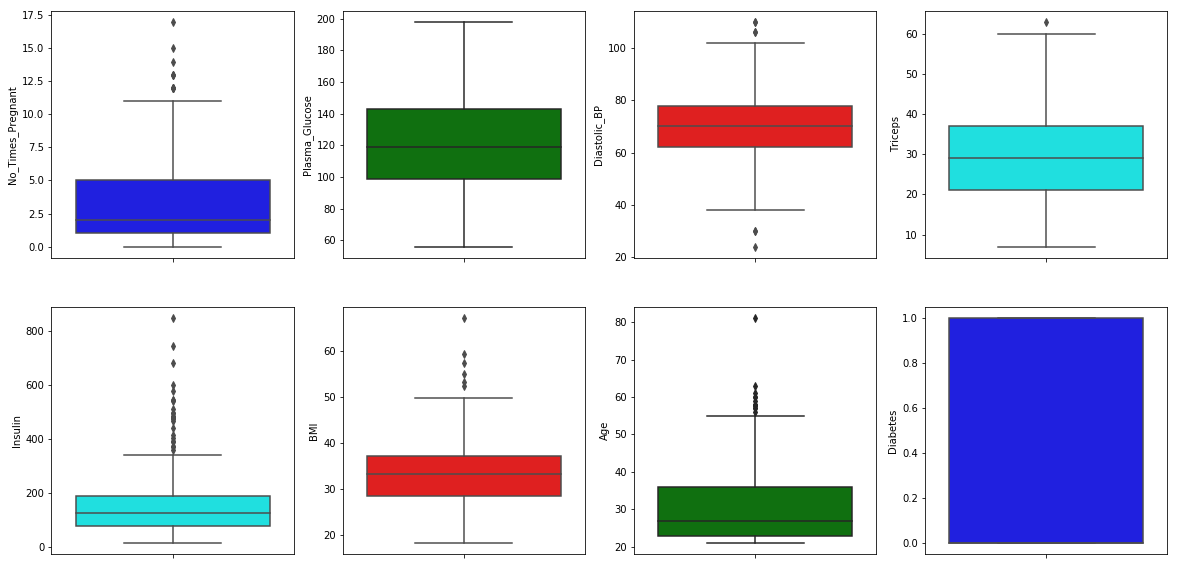

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(y = diabetes.No_Times_Pregnant,color='blue')
plt.subplot(2,4,2)
sns.boxplot(y = diabetes.Plasma_Glucose,color='green')
plt.subplot(2,4,3)
sns.boxplot(y = diabetes.Diastolic_BP,color='red')
plt.subplot(2,4,4)
sns.boxplot(y = diabetes.Triceps,color='cyan')
plt.subplot(2,4,5)
sns.boxplot(y = diabetes.Insulin,color='cyan')
plt.subplot(2,4,6)
sns.boxplot(y = diabetes.BMI,color='red')
plt.subplot(2,4,7)
sns.boxplot(y = diabetes.Age,color='green')
plt.subplot(2,4,8)
sns.boxplot(y = diabetes.Diabetes,color='blue')
plt.show()

In [8]:
diabetes.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,1
2,3,78,50,32,88,31.0,26,1
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,1


In [9]:
diabetes_1=(diabetes-diabetes.mean())/diabetes.std()
diabetes_1.describe()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-1.642677e-17,5.540494e-18,-4.299282e-16,9.686129e-17,7.831037e-17,3.188493e-15,5.083802e-17,2.316741e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.027899e+00,-2.158972e+00,-3.734229e+00,-2.105793e+00,-1.195339e+00,-2.118234e+00,-9.670632e-01,-7.035037e-01
25%,-7.165108e-01,-7.656174e-01,-6.932780e-01,-7.745416e-01,-6.673258e-01,-6.668258e-01,-7.709997e-01,-7.035037e-01
50%,-4.051225e-01,-1.175457e-01,-5.307782e-02,-1.382677e-02,-2.571162e-01,1.618967e-02,-3.788727e-01,-7.035037e-01
75%,5.290424e-01,6.601404e-01,5.871224e-01,7.468881e-01,2.856226e-01,5.711397e-01,5.034131e-01,1.417831e+00
max,4.265702e+00,2.442338e+00,3.147923e+00,3.219211e+00,5.805571e+00,4.839986e+00,4.914842e+00,1.417831e+00


In [10]:
diabetes_y = diabetes.pop('Diabetes')
diabetes_X = diabetes

In [11]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

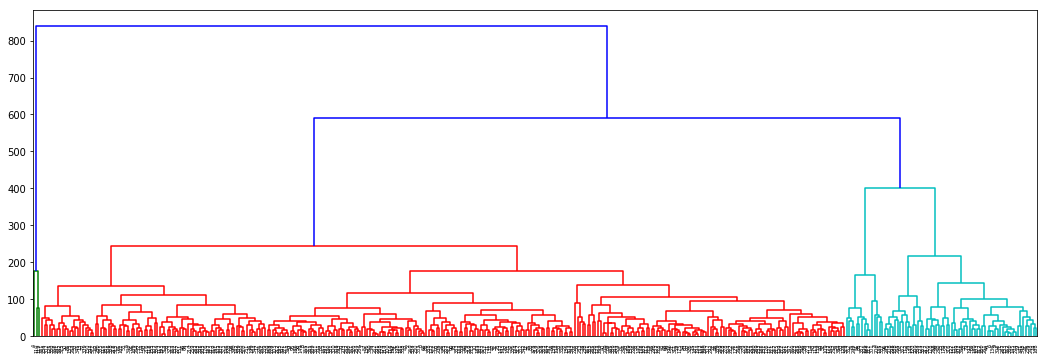

In [12]:
plt.figure(figsize=(18,6))
diabetes_X_c = linkage(diabetes_X,method='complete',metric='euclidean')
dendrogram(diabetes_X_c)
plt.show()

In [13]:
Cluster_cut = pd.Series(cut_tree(diabetes_X_c,n_clusters=3).reshape(-1))
Cluster_cut = pd.DataFrame(Cluster_cut)


In [14]:
col = ['No_Times_Pregnant', 'Plasma_Glucose', 'Diastolic_BP', 'Triceps','Insulin', 'BMI', 'Age','Cid']
diabetes_X = pd.concat([diabetes_X,Cluster_cut],axis='columns')
diabetes_X.columns = col

In [15]:
diabetes_X.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Cid
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,0
2,3,78,50,32,88,31.0,26,0
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,2


In [16]:
train_X,test_X,train_y,test_y = train_test_split(diabetes_X,diabetes_y,train_size = 0.70,test_size=0.30,random_state=100)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
col = ['No_Times_Pregnant', 'Plasma_Glucose', 'Diastolic_BP', 'Triceps','Insulin', 'BMI', 'Age','Cid']
scale = StandardScaler()
train_X[col] = scale.fit_transform(train_X[col])
train_X.head()

C:\Users\sumasark\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sumasark\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Cid
169,1.815945,0.957700,0.567715,0.470846,0.087700,0.124473,0.279158,-0.508256
265,0.873580,0.211296,1.537905,-2.077303,1.358030,-1.912926,3.018166,1.812778
386,-0.697030,-0.048323,0.567715,0.942726,-0.707281,0.794302,-0.228066,-0.508256
241,0.873580,1.022605,0.567715,1.131478,-0.166366,1.785092,-0.329510,-0.508256
249,-0.697030,0.535819,-0.725872,1.131478,2.620165,1.031534,-0.938179,1.812778


In [19]:
round(train_X.describe(),3)

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Cid
count,274.000,274.000,274.000,274.000,274.000,274.000,274.000,274.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000
std,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002
min,-1.011,-2.158,-3.313,-2.077,-1.191,-2.108,-0.938,-0.508
25%,-0.697,-0.762,-0.726,-0.827,-0.674,-0.657,-0.735,-0.508
50%,-0.383,-0.113,0.002,-0.001,-0.277,-0.001,-0.431,-0.508
75%,0.559,0.666,0.729,0.754,0.272,0.561,0.482,-0.508
max,4.329,2.386,3.155,2.925,5.620,4.716,3.322,4.134


In [20]:
import statsmodels.api as sm

In [21]:
train_X_m1 = train_X
train_X_m1 = sm.add_constant(train_X_m1)
lm1 = sm.GLM(train_y,train_X_m1,family=sm.families.Binomial()).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Diabetes   No. Observations:                  274
Model:                            GLM   Df Residuals:                      265
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -115.84
Date:                Thu, 13 Jun 2019   Deviance:                       231.69
Time:                        08:56:28   Pearson chi2:                     280.
No. Iterations:                     5   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.0395      0.179     -5.817      0.000      -1.390      -0.689
No_Times_Pregnant     0.2855      0.216      1.324      0.185      -0.137       0.708
Plasma_Glucose        1.3017      0.225      5.798      0.000       0.862       1.742
Diastolic_BP          0.0325      0.181      0.180      0.857      -0.321       0.386
Triceps               0.1293      0.212      0.609      0.542      -0.287       0.545
Insulin               0.7179      0.308      2.328      0.020       0.113       1.322
BMI                   0.5020      0.227      2.216      0.027       0.058       0.946
Age                   0.3004      0.226      1.330      0.183      -0.142       0.743
Cid                  -1.0250      0.304     -3.367      0.001      -1.622      -0.428
=====================================================================================
"""

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [23]:
lm = LogisticRegression()
lm.fit(train_X,train_y)
rfe = RFE(lm,5)
rfe.fit(train_X,train_y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=5, step=1, verbose=0)

In [24]:
list(zip(train_X.columns,rfe.ranking_,rfe.support_))

[('No_Times_Pregnant', 2, False),
 ('Plasma_Glucose', 1, True),
 ('Diastolic_BP', 4, False),
 ('Triceps', 3, False),
 ('Insulin', 1, True),
 ('BMI', 1, True),
 ('Age', 1, True),
 ('Cid', 1, True)]

In [25]:
train_X = train_X[train_X.columns[rfe.support_]]

In [26]:
train_X_m2 = train_X
#train_y = np.array(train_y).reshape(-1,1)

In [27]:
train_X_m2 = sm.add_constant(train_X_m2)
lm2 = sm.GLM(train_y,train_X_m2,family=sm.families.Binomial()).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Diabetes   No. Observations:                  274
Model:                            GLM   Df Residuals:                      268
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -116.92
Date:                Thu, 13 Jun 2019   Deviance:                       233.85
Time:                        08:56:29   Pearson chi2:                     288.
No. Iterations:                     5   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.0221      0.176     -5.803      0.000      -1.367      -0.677
Plasma_Glucose     1.3109      0.224      5.860      0.000       0.872       1.749
Insulin            0.6917      0.305      2.269      0.023       0.094       1.289
BMI                0.5711      0.178      3.203      0.001       0.222       0.920
Age                0.5248      0.165      3.176      0.001       0.201       0.849
Cid               -1.0298      0.301     -3.416      0.001      -1.621      -0.439
==================================================================================
"""

In [28]:
# train_X_m3 = train_X_m2.drop('Triceps',axis='columns')
# train_X_m3 = sm.add_constant(train_X_m3)
# lm3 = sm.GLM(train_y,train_X_m3,family=sm.families.Binomial()).fit()
# lm3.summary()

In [29]:
# train_X_m4 = train_X_m3.drop('No_Times_Pregnant',axis='columns')
# train_X_m4 = sm.add_constant(train_X_m4)
# lm4 = sm.GLM(train_y,train_X_m4,family=sm.families.Binomial()).fit()
# lm4.summary()

In [30]:
#train_X_m4 = train_X_m4.drop('const',axis='columns')

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
# Calculating VIF
vif = pd.DataFrame()
X = train_X_m2
X = X.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending=False)
vif

,Features,VIF
1,Insulin,3.90
4,Cid,3.25
0,Plasma_Glucose,1.65
3,Age,1.14
2,BMI,1.05


In [33]:
y_train_pred = lm2.predict(train_X_m2)

In [34]:
y_train_pred[:10]

169    0.737891
265    0.234884
386    0.327980
241    0.828250
249    0.431119
178    0.716923
362    0.113184
19     0.864700
26     0.348572
297    0.109376
dtype: float64

In [35]:
y_train_pred_final = pd.DataFrame({'Diabetics':train_y.values,'Diabetics_prob':y_train_pred})
y_train_pred_final['ID'] = train_y.index
y_train_pred_final.head()

,Diabetics,Diabetics_prob,ID
169,1,0.737891,169
265,0,0.234884,265
386,0,0.327980,386
241,0,0.828250,241
249,0,0.431119,249


In [36]:
y_train_pred_final['Predicted'] = y_train_pred_final.Diabetics_prob.map(lambda x :1 if x>0.5 else 0)
y_train_pred_final.head()

,Diabetics,Diabetics_prob,ID,Predicted
169,1,0.737891,169,1
265,0,0.234884,265,0
386,0,0.327980,386,0
241,0,0.828250,241,1
249,0,0.431119,249,0


In [37]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [38]:
accuracy_score(y_train_pred_final.Diabetics,y_train_pred_final.Predicted)

0.8102189781021898

In [39]:
confusion = confusion_matrix(y_train_pred_final.Diabetics,y_train_pred_final.Predicted)
confusion

array([[161,  21],
       [ 31,  61]], dtype=int64)

In [40]:
TP = confusion[1,1]
TN = confusion[0,0]
FN = confusion[1,0]
FP = confusion[0,1]

In [41]:
# Sensitivity
TP/float(TP+FN)

0.6630434782608695

In [42]:
#Specificity
TN/float(TN+FP)

0.8846153846153846

In [43]:
# Positive Predicted Values
TP/float(TP+FP)

0.7439024390243902

In [44]:
# Negative Predicted Value
TN/float(TN+FN)

0.8385416666666666

In [45]:
from sklearn.metrics import roc_curve,roc_auc_score

In [46]:
def draw_roc(actual,pred):
    fpr,tpr,threshold = roc_curve(actual,pred,drop_intermediate=False)
    auc_score = roc_auc_score(actual,pred)
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.legend(loc="lower right")
    plt.show()
    return None

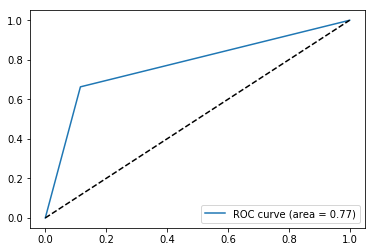

In [47]:
draw_roc(y_train_pred_final.Diabetics,y_train_pred_final.Predicted)

In [48]:
numbers = [float(x/10) for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Diabetics_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Diabetics,Diabetics_prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
169,1,0.737891,169,1,1,1,1,1,1,1,1,1,0,0
265,0,0.234884,265,0,1,1,1,0,0,0,0,0,0,0
386,0,0.327980,386,0,1,1,1,1,0,0,0,0,0,0
241,0,0.828250,241,1,1,1,1,1,1,1,1,1,1,0
249,0,0.431119,249,0,1,1,1,1,1,0,0,0,0,0


In [49]:
cut_off = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
num =[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm = confusion_matrix(y_train_pred_final.Diabetics,y_train_pred_final[i])
    tot = sum(sum(cm))
    acc = (cm[0,0]+cm[1,1])/tot
    sensi = cm[1,1]/(cm[1,1]+cm[1,0])
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    cut_off.loc[i] = [i,acc,sensi,speci]
cut_off

,prob,accuracy,sensi,speci
0.0,0.0,0.335766,1.000000,0.000000
0.1,0.1,0.576642,0.934783,0.395604
0.2,0.2,0.733577,0.913043,0.642857
0.3,0.3,0.788321,0.804348,0.780220
0.4,0.4,0.817518,0.739130,0.857143
0.5,0.5,0.810219,0.663043,0.884615
0.6,0.6,0.806569,0.586957,0.917582
0.7,0.7,0.781022,0.413043,0.967033
0.8,0.8,0.751825,0.315217,0.972527
0.9,0.9,0.697080,0.108696,0.994505


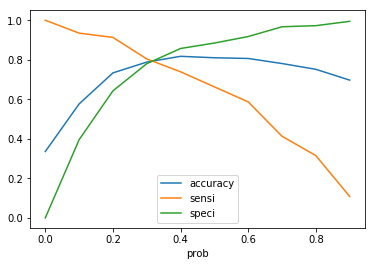

In [50]:
cut_off.plot.line(x = 'prob',y=['accuracy','sensi','speci'])
plt.show()

In [51]:
y_train_pred_final['Final_Pred'] = y_train_pred_final.Diabetics_prob.map(lambda x : 1 if x>0.3 else 0)
y_train_pred_final.head()

,Diabetics,Diabetics_prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Pred
169,1,0.737891,169,1,1,1,1,1,1,1,1,1,0,0,1
265,0,0.234884,265,0,1,1,1,0,0,0,0,0,0,0,0
386,0,0.327980,386,0,1,1,1,1,0,0,0,0,0,0,1
241,0,0.828250,241,1,1,1,1,1,1,1,1,1,1,0,1
249,0,0.431119,249,0,1,1,1,1,1,0,0,0,0,0,1


In [52]:
confusion = confusion_matrix(y_train_pred_final.Diabetics,y_train_pred_final.Final_Pred)
confusion

array([[142,  40],
       [ 18,  74]], dtype=int64)

In [53]:
accuracy_score(y_train_pred_final.Diabetics,y_train_pred_final.Final_Pred)

0.7883211678832117

In [54]:
TP = confusion[1,1]
TN = confusion[0,0]
FN = confusion[1,0]
FP = confusion[0,1]

In [55]:
# Sensitivity
TP/float(TP+FN)

0.8043478260869565

In [56]:
# Specificity
TN/float(TN+FP)

0.7802197802197802

In [57]:
# Precision
TP/float(TP+FP)

0.6491228070175439

In [58]:
# Recall
TP/float(TP+FN)

0.8043478260869565

In [59]:
from sklearn.metrics import precision_recall_curve

In [60]:
p,r,threshold = precision_recall_curve(y_train_pred_final.Diabetics,y_train_pred_final.Diabetics_prob)

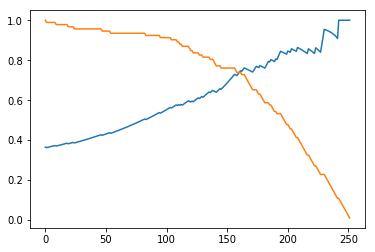

In [61]:
plt.plot(p[:-1])
plt.plot(r[:-1])

In [62]:
test_X[['No_Times_Pregnant', 'Plasma_Glucose', 'Diastolic_BP', 'Triceps','Insulin', 'BMI', 'Age','Cid']]= scale.transform(test_X[['No_Times_Pregnant', 'Plasma_Glucose', 'Diastolic_BP', 'Triceps','Insulin', 'BMI', 'Age','Cid']])

C:\Users\sumasark\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [63]:
sel_cols = ['Plasma_Glucose', 'Insulin', 'BMI', 'Age', 'Cid']
test_X = test_X[sel_cols]

In [64]:
test_X.head()

,Plasma_Glucose,Insulin,BMI,Age,Cid
124,1.055057,-0.084410,-0.001120,2.105163,-0.508256
140,-0.502656,-0.707281,0.459388,-0.532400,-0.508256
276,-0.729823,0.448310,0.850122,1.293605,-0.508256
252,0.081486,-0.313889,-0.615131,1.496495,-0.508256
326,-0.729823,-0.936760,-1.926881,-0.228066,-0.508256


In [65]:
test_X_new = test_X

In [66]:
test_X_new = sm.add_constant(test_X_new)
y_test_pred = lm2.predict(test_X_new)

In [67]:
y_test_pred[:10]

124    0.873269
140    0.159239
276    0.504768
252    0.456390
326    0.034776
136    0.143602
369    0.236372
132    0.558159
387    0.895943
174    0.041870
dtype: float64

In [68]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(test_y)
y_test_df['ID'] = y_test_df.index

In [69]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [70]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [71]:
y_pred_final = y_pred_final.rename(columns={0:'Prob'})

In [74]:
y_pred_final = y_pred_final.reindex_axis(['Diabetes','ID','Prob'], axis=1)

In [76]:
y_pred_final['Final'] = y_pred_final.Prob.map(lambda x:1 if x>0.3 else 0)

In [78]:
y_pred_final.head()

,Diabetes,ID,Prob,Final
0,1,124,0.873269,1
1,1,140,0.159239,0
2,1,276,0.504768,1
3,1,252,0.456390,1
4,0,326,0.034776,0


In [79]:
accuracy_score(y_pred_final.Diabetes,y_pred_final.Final)

0.7288135593220338

In [81]:
confusion = confusion_matrix(y_pred_final.Diabetes,y_pred_final.Final)

In [82]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [84]:
confusion

array([[57, 23],
       [ 9, 29]], dtype=int64)

In [83]:
# Sensitivity
TP / float(TP+FN)

0.7631578947368421

In [85]:
# Specificity
TN / float(TN+FP)

0.7125

In [86]:
# Correctly identified positive
TP/float(TP+FP)

0.5576923076923077